In [142]:
### Setting the environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
### Loading data
source_ckan = pd.read_csv('../ckan_output.csv')
source_ckan['Source'] = 'ckan'
source_gsheets = pd.read_csv('../from_Google_Sheets.csv')
source_gsheets['Source'] = 'gsheets'
data = source_ckan.append(source_gsheets)
data['Owner'] = data['Owner'].str.replace(' Council','')


data_localauthorities = pd.read_csv('../local_authorities_list.csv').rename(columns={'itemLabel':'Council'})
data_localauthorities['Council'] = data_localauthorities['Council'].str.replace(' Council','')


data_distinct = data[['Owner','Title','PageURL','Source']]
data_distinct = data_distinct.drop_duplicates()

data_tags = data[['Owner', 'PageURL','OriginalTags','ManualTags']]
data_tags = data_tags.drop_duplicates()

#data

In [172]:
print('data: ', len(data))
print('data_distinct: ', len(data_distinct))
print('data_tags: ', len(data_tags))

data:  600
data_distinct:  168
data_tags:  155


In [173]:
#list(data)

In [174]:
### PLT

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        

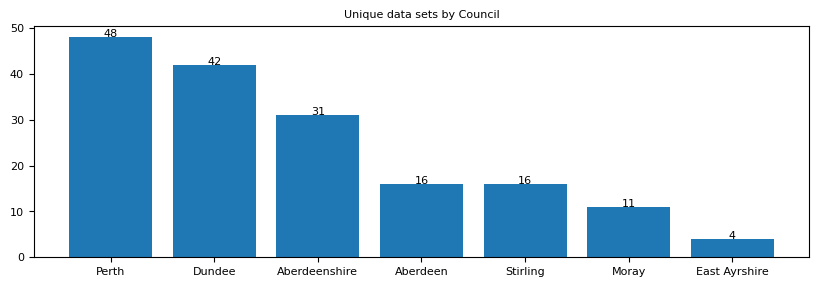

In [175]:
stats_a = data_distinct.groupby(['Owner']).size().reset_index().rename(columns={0:'Count'})
stats_a = stats_a.sort_values(by=['Count'], ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,3))
plt.bar(x=stats_a['Owner'], height=stats_a['Count'])
plt.ylabel(''), plt.xlabel('')
addlabels(stats_a['Owner'], stats_a['Count'])
plt.title('Unique data sets by Council')
plt.savefig('Unique data sets by Council.png')
plt.show()


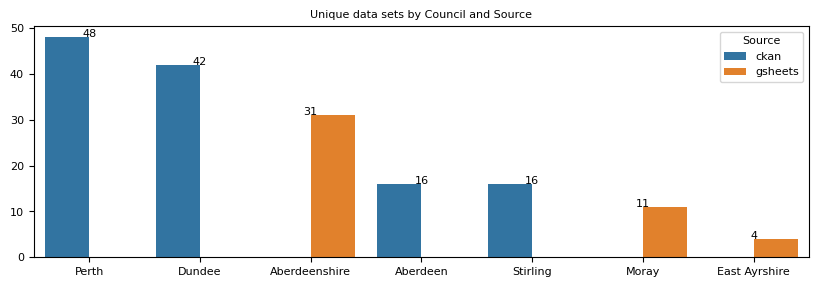

In [176]:
stats_b = data_distinct.groupby(['Owner','Source']).size().reset_index().rename(columns={0:'Count'})
#stats_b = stats_b.pivot(index='Owner',columns='Source', values='count').reset_index()
stats_b = stats_b.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
stats_b

plt.figure(figsize=(10,3))
#plt.bar(x=stats_a['Owner'], height=stats_a['Count'])
sns.barplot(x='Owner', y='Count', data=stats_b, hue='Source')
plt.ylabel(''), plt.xlabel('')
addlabels(stats_b['Owner'], stats_b['Count'])
plt.title('Unique data sets by Council and Source')
plt.savefig('Unique data sets by Council and Source.png')
plt.show()


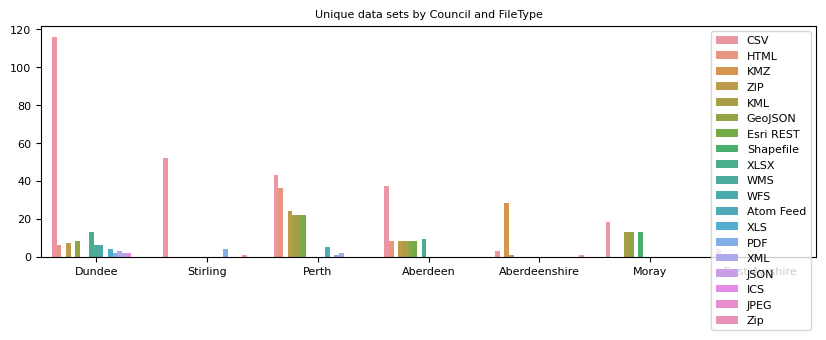

In [177]:
stats_c = data.groupby(['Owner','FileType']).size().reset_index().rename(columns={0:'Count'})
stats_c = stats_c.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
stats_c

plt.figure(figsize=(10,3))
#plt.bar(x=stats_a['Owner'], height=stats_a['Count'])
sns.barplot(x='Owner', y='Count', data=stats_c, hue='FileType')
plt.ylabel(''), plt.xlabel('')
#addlabels(stats_c['Owner'], stats_c['Count'])
plt.title('Unique data sets by Council and FileType')
plt.legend(loc='upper right')
plt.savefig('Unique data sets by Council and FileType.png')
plt.show()


In [178]:
data_tags['AllTags'] = data_tags.apply(lambda x: str(x['OriginalTags'])+ ';' + str(x['ManualTags']), axis=1)
data_tags['AllTags_Tuple'] = data_tags['AllTags'].str.split(';')

stats_d = data_tags[['Owner','AllTags_Tuple']]
'''
plt.figure(figsize=(10,3))
sns.barplot(x='Owner', y='Count', data=stats_c, hue='FileType')
plt.ylabel(''), plt.xlabel('')
#addlabels(stats_c['Owner'], stats_c['Count'])
plt.title('Unique data sets by Council and FileType')
plt.legend(loc='upper right')
plt.show()
'''
stats_d

,Owner,AllTags_Tuple
0,Aberdeen,"[Aberdeen, Contracts, Finance, nan]"
1,Aberdeen,"[Aberdeen, Military, nan]"
12,Aberdeen,"[Academy Catchments, Academy Zones, Boundaries..."
18,Aberdeen,"[Air Quality, Environment, Health, Nitrogen Di..."
24,Aberdeen,"[Aberdeen, Art Gallery, Design, Fashion, Museu..."
...,...,...
82,Aberdeenshire,"[nan, Public offices, council offices]"
83,Aberdeenshire,"[nan, Polling, democracy, ]"
85,Aberdeenshire,"[nan, Schools, education]"
87,Aberdeenshire,"[nan, Toilets]"


No handles with labels found to put in legend.


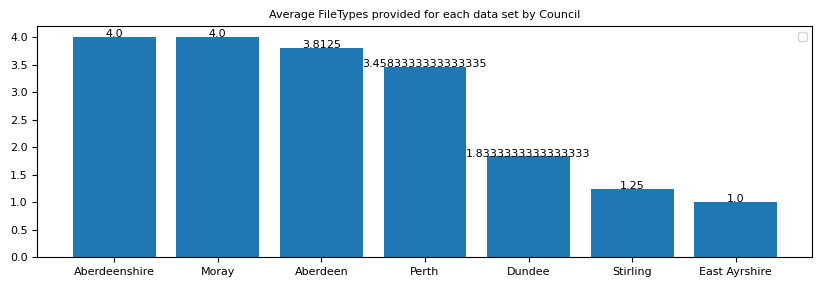

In [179]:
stats_e = data.groupby(['Owner','PageURL'])['FileType'].nunique().reset_index()
stats_e = stats_e.groupby(['Owner'])['FileType'].mean().reset_index()
stats_e = stats_e.sort_values(by=['FileType'], ascending=False).reset_index(drop=True)
stats_e

plt.figure(figsize=(10,3))
plt.bar(x=stats_e['Owner'], height=stats_e['FileType'])
plt.ylabel(''), plt.xlabel('')
addlabels(stats_e['Owner'], stats_e['FileType'])
plt.title('Average FileTypes provided for each data set by Council')
plt.legend(loc='upper right')
plt.savefig('Average FileTypes provided for each data set by Council.png')
plt.show()

# Scorecard

- Has an open data portal/site
- Has content on the site
- Data has been published within (the last 1 year, 6 months, 90 days, 30 days)

In [196]:
data.groupby(['Owner'])['PageURL'].size()

Owner
Aberdeen          92
Aberdeenshire     33
Dundee           178
East Ayrshire      4
Moray             57
Perth            179
Stirling          57
Name: PageURL, dtype: int64

In [195]:
scorecard = data_localauthorities.copy()
scorecard['Has OD Site'] = scorecard['Council'].map(data.groupby(['Owner'])['PageURL'].size())
scorecard

,Council,Has OD Site
0,Aberdeen City,NaN
1,Aberdeenshire,33.0
2,Angus,NaN
3,Argyll and Bute,NaN
4,City of Edinburgh,NaN
5,Clackmannanshire,NaN
6,Comhairle nan Eilean Siar,NaN
7,Dumfries and Galloway,NaN
8,Dundee City,NaN
9,East Ayrshire,4.0
